                                ET3112- Image Processing  
                                Assignment 4 -CNN  
 Name - KV Wickramanayake  
 Index No - D/ENG/21/0073/EE  
 GitHub link - https://github.com/KisajaW/Assignment4                               
                                

Found 1800 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Epoch 1/20
56/56 [==============================] - 6s 97ms/step - loss: 0.3677 - accuracy: 0.8286 - val_loss: 0.5630 - val_accuracy: 0.7882
Epoch 2/20
56/56 [==============================] - 5s 95ms/step - loss: 0.0605 - accuracy: 0.9796 - val_loss: 0.8802 - val_accuracy: 0.7795
Epoch 3/20
56/56 [==============================] - 5s 95ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.7859 - val_accuracy: 0.8299
Epoch 4/20
56/56 [==============================] - 5s 97ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 1.8857 - val_accuracy: 0.7569
Epoch 5/20
56/56 [==============================] - 5s 90ms/step - loss: 0.0103 - accuracy: 0.9960 - val_loss: 0.6562 - val_accuracy: 0.8785
Epoch 6/20
56/56 [==============================] - 5s 93ms/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.8834 - val_accuracy: 0.8490
Epoch 7/20
56/56 [============

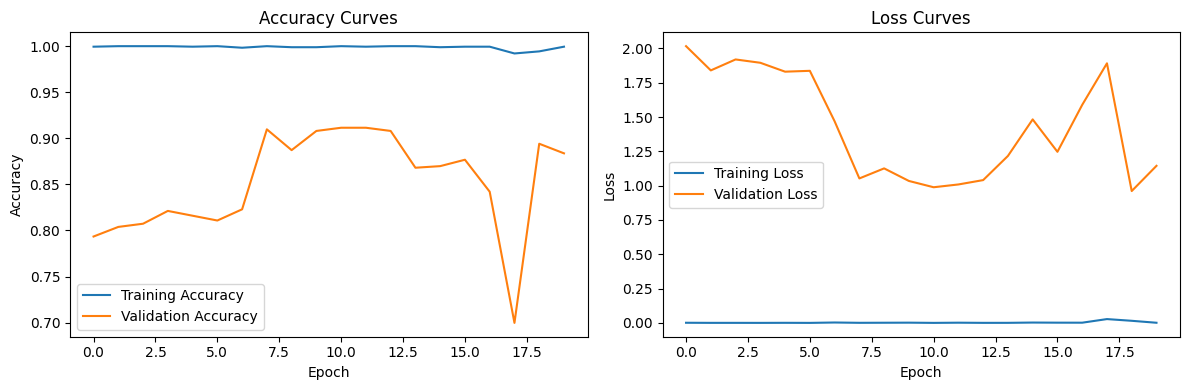

1/1 [==============================] - 0s 34ms/step


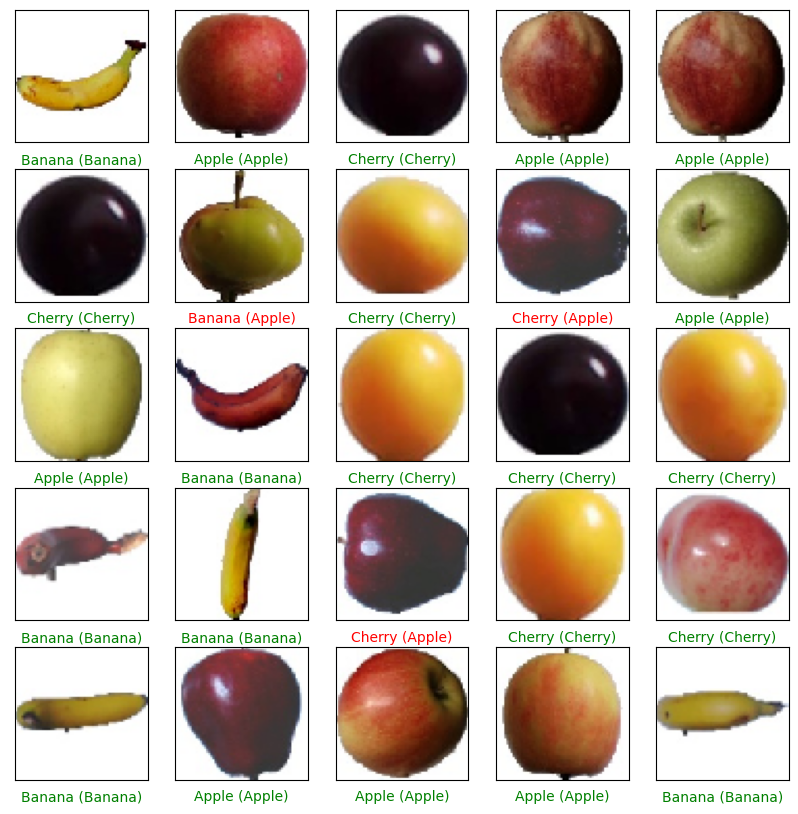

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


#paths to dataset folders
train_dir = "./Training"
test_dir = "./Test/Testing"
validation_dir = "./Test/Validation"

#Preprocessing the dataset
batch_size = 32
img_size = (64, 64)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = valid_test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

#Compiling the model
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
loss='categorical_crossentropy',
metrics=['accuracy'])

#Training the CNN model
epochs = 20
history = model.fit(
train_generator,
steps_per_epoch=train_generator.n // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_generator.n // batch_size
)

#Saving the best model based on validation accuracy
best_model_path = 'best_model.h5'
best_model_callback = tf.keras.callbacks.ModelCheckpoint(
best_model_path,
monitor='val_accuracy',
save_best_only=True,
mode='max',
verbose=1
)

#Training the CNN model with best model callback
history = model.fit(
train_generator,
steps_per_epoch=train_generator.n // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_generator.n // batch_size,
callbacks=[best_model_callback]
)

#Loading the bestmodel
best_model = tf.keras.models.load_model(best_model_path)

#Evaluating the model on the validation set
validation_loss, validation_accuracy = best_model.evaluate(validation_generator)

#Printing evaluation metrics
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

#Evaluating the model on the testing set
test_loss, test_accuracy = best_model.evaluate(test_generator)

#Printing evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on the validation set
validation_loss, validation_accuracy = best_model.evaluate(validation_generator)

# Print evaluation metrics
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

# Generate predictions for the validation set
validation_images, validation_labels = next(iter(validation_generator))
validation_predictions = best_model.predict(validation_images)
validation_predicted_classes = np.argmax(validation_predictions, axis=1)

# Get class labels from the generator
class_labels = list(validation_generator.class_indices.keys())

# Generate classification report
validation_report = classification_report(validation_labels.argmax(axis=1), validation_predicted_classes, target_names=class_labels)
print("Validation Classification Report:")
print(validation_report)

# Generate confusion matrix
validation_confusion_matrix = confusion_matrix(validation_labels.argmax(axis=1), validation_predicted_classes)
print("Validation Confusion Matrix:")
print(validation_confusion_matrix)

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.tight_layout()
plt.show()

# Predicting classes for test images
test_images, test_labels = next(iter(test_generator))
predictions = best_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Plotting sample predictions
plt.figure(figsize=(10, 10))
num_images = min(len(test_images), 25)
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    true_label = class_labels[np.argmax(test_labels[i])]
    pred_label = class_labels[predicted_classes[i]]
    if true_label == pred_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(pred_label, true_label), color=color)
plt.show()



